# Scrapped News

## Importing News Corpus 

This News corpus can be updated after each session.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving news_articles_final.csv to news_articles_final.csv


In [ ]:
import pandas as pd

news = pd.read_csv('news_articles_final.csv')

news.head()


,Unnamed: 0,Headline,Content
0,0,"IMD: Clear skies, less intense heat over Pune ...",Heat conditions over Pune were relatively less...
1,1,Arvind Kejriwal says no plan for lockdown in D...,Even as the Covid-19 cases continue to rise in...
2,2,BJP opposes Pune administration’s decision to ...,The BJP on Friday slammed the Pune administrat...
3,3,Body of Delhi Police constable’s wife found ha...,A Delhi Police constable’s wife allegedly hang...
4,4,"Pune: HSC board exams from April 23, hall tick...",– Stay updated with the latest Pune news. Foll...


In [ ]:
news.columns

Index(['Headline', 'Content'], dtype='object')

## Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
from nltk.tokenize.toktok import ToktokTokenizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import re
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords
from scipy.sparse import csr_matrix
import nltk
import  sklearn
from collections import Counter
stemmer = SnowballStemmer('english')
tokenizer = ToktokTokenizer()
nltk.download('stopwords')
stops = set(stopwords.words('english'))
from sklearn.decomposition import LatentDirichletAllocation
 
no_of_recommends = 10
n_topics = 10
no_of_clusters = 10
news = news[['Headline','Content']].dropna()
contents = news["Content"].tolist()
title = news['Headline']
# article_id = news['Article_Id']
from sklearn.preprocessing import Normalizer
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.preprocessing import normalize
import pickle as pk



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

## Stemming and Tokenization of the Content

In [ ]:
def clean_tokenize(document):                                 ## here documents are the contents of the articles stored in the list format
    document = re.sub('[^\w_\s-]',' ',document)               ## regex sub fucntion was to remove regex from content before tokenization
    tokens  = nltk.word_tokenize(document)                    ## Tokenizing all the words of the article
    cleaned_article = ' '.join([stemmer.stem(item) for item in tokens])   #Fir har token ka stem leke join kr diya in an attempt to reconstruct the articles.
    return cleaned_article

print('apple')
cleaned_articles = list(map(clean_tokenize,contents))         ## All the contents in the list form are going into a function called clean tokenzise

apple


In [ ]:
print(len(cleaned_articles))

3035


## Removing Stopwords

Since our stopwords "stop" is a set, we further add some stopwords to be reomved and add it to the set with the help of union function.

In [ ]:
type(stops)

set

In [ ]:
my_additional_stop_word_list = {'said','people','says','told','from', 'Promoted', 'Jiosavan', 'PromotedListen', 'courtsey', 'image', } #further addition of stop words found irelevant to document (contains promotion content on news website)
stops.union(my_additional_stop_word_list)

In [ ]:
def Remove_stopwords(list_articles):

   total_WordVocab = []
   for i in range(0,len(cleaned_articles)) :                                   
        word_tokens = nltk.word_tokenize(cleaned_articles[i])                   ## tokenize all the words of the articles one by one and form a list of them
        for words in word_tokens :
            total_WordVocab.append(words)                                       ## Based on the Words from each of the articles append the Vocabulary
        counts = Counter(total_WordVocab)                                      
   vocab = {j:i for i,j in enumerate(counts.keys())}                           ## Make a dictionary of all the words with freq.
 
   stops_removed = [word for word in vocab.keys() if word not in stops]        ## Remove the stop words from the vocab dictionary, and forming a list of the remaing words.
 
   Final_VocabDict = {j:i for i,j in enumerate(stops_removed)}                 ### Dict of the accepted words with the number

   return Final_VocabDict

In [ ]:
no_stopwords_article = Remove_stopwords(cleaned_articles) #final articles content with stop words removed

## Exploratory Data Analysis

Count vectorizer is generated for all the articles in the corpus, and most common words excluding stop words that are used in the document are plotted.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

def get_top_n_words(n_top_words, count_vectorizer, text_data):
    '''
    returns a tuple of the top n words in a sample and their 
    accompanying counts, given a CountVectorizer object and text sample
    '''
    vectorized_headlines = count_vectorizer.fit_transform(text_data.values)
    vectorized_total = np.sum(vectorized_headlines, axis=0)
    word_indices = np.flip(np.argsort(vectorized_total)[0,:], 1)
    word_values = np.flip(np.sort(vectorized_total)[0,:],1)
    
    word_vectors = np.zeros((n_top_words, vectorized_headlines.shape[1]))
    for i in range(n_top_words):
        word_vectors[i,word_indices[0,i]] = 1

    words = [word[0].encode('ascii').decode('utf-8') for 
             word in count_vectorizer.inverse_transform(word_vectors)]

    return (words, word_values[0,:n_top_words].tolist()[0])

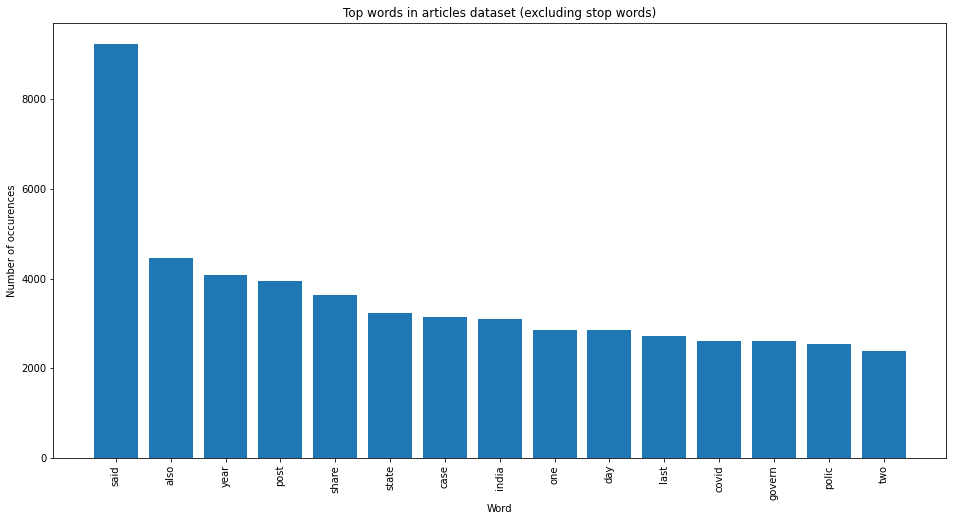

In [ ]:
import matplotlib.pyplot as plt


count_vectorizer = CountVectorizer(stop_words=frozenset(stops))

words, word_values = get_top_n_words(n_top_words=15, count_vectorizer=count_vectorizer, text_data=pd.Series(cleaned_articles))

fig, ax = plt.subplots(figsize=(16,8))
ax.bar(range(len(words)), word_values);
ax.set_xticks(range(len(words)));
ax.set_xticklabels(words, rotation='vertical');
ax.set_title('Top words in articles dataset (excluding stop words)');
ax.set_xlabel('Word');
ax.set_ylabel('Number of occurences');
plt.show()

A skewed distribution was observed. Word 'said' was found to be the most common word in the list of all the words. 

## Choosing The correct cluster size



No. of components/no. of topics/cluster size is  a hyperparameter and should be defined when calling the instance of LDA. 

So value for the hyperparameter based on the initial dataset was found out by calculating coherence score and the analysis for the same can be found out in seperate notebook titled 'Evaluate Topic Models'. No. of components which was found to give best results was 10.

## Performing LDA

TF-IDF matrix for the words appearing in the documents was constructed, with assigning higher values to words which occur less frequently in the document. This words help in assigning identity to the document as they are relatively unique to the document

The approach seems to produce better output as compared to countvectorizer which assigns higher values to the most common occuring words. The approach works poorer as the higher values are assigned for common words which doesn't differentiate two articles on based of a single word.

In [ ]:
def Topic_Modeller(Final_VocabDict):

    Tfidf = TfidfVectorizer(min_df=1,vocabulary=Final_VocabDict)                ## Removing words below the minimum threshold . 
 
 
    Tfidf_Matrix = Tfidf.fit_transform(cleaned_articles)                        ## Generating Tf-IDF matrix
 
    Lda = LatentDirichletAllocation(n_components=n_topics,max_iter=1,random_state=0)
    
    Lda_articlemat = Lda.fit_transform(Tfidf_Matrix)

 
    return Lda_articlemat  

In [ ]:
Lda_articlemat = Topic_Modeller(no_stopwords_article)

In [ ]:
Lda_articlemat.shape

(3035, 10)

## Performing Clustering Based on LDA

Clustering using K-means was performed for the topics generated using LDA

In [ ]:
kmeans = KMeans(n_clusters=no_of_clusters)
clustered_articles_matrix = kmeans.fit_transform(Lda_articlemat)  

In [ ]:
clustered_articles_matrix.shape

(3035, 10)

In [ ]:
wordtokens_article = [word.split() for word in cleaned_articles]
len(wordtokens_article)

3035

In [ ]:
len(wordtokens_article[1])

514

## Defining User Profiler

This funtion generates the user profile matrix based on which we will make recommendations to the user

Based on the no. of words in the document user interest i.e. whether the user has read the article or not is calculated if the time taken by the reader divided by the average time to read an article is close to one then it is counted that user has read the article

In [ ]:
def user_profiler(wordtokens,article_read,article_time):
    user_profile = []
    wordPer_second = 5                #average no. of words read in a second
    

    for i in range(len(wordtokens)):                                        

        average_time = (len(wordtokens[i])/wordPer_second) #length of wordtokslist by wps gives us avg time to read the article
         
        user_interest_timevalue = article_time[i]/average_time  #article_times divide by avg times of each article                   
        
        user_profile_generate = (article_read[i]*user_interest_timevalue)   #clustered_articles_matrix[] * user_interest_time calculated                 
        
        user_profile.append(user_profile_generate)                                      

    return sum(normalize(user_profile))                             




In [ ]:
User_profile_df

,UserId,SessionID,ArticleID,Time_Spent
0,1,1,600,120
1,1,1,99,60
2,1,1,120,30


Suppose Sample user profiler is one of the dataframe provided to us. Then it will be converted using the user profiler


Initially a clickstream dataset for 1000 users was generated using Gaussian mixture model which generates the data about the amount of time user spent on the article so that whether it should be counted as whether user have read the article or not with interest.

A detailed explanation and code implemenation on how the user dataset is generated can be found in the Notebook titled 'User Profiler'

In [ ]:
sample_user_profile = {'UserId': ['1','1','1'],
                       'SessionID': [1,1,1],
                       'ArticleID' : [600,99,120],
                       'Time_Spent' : [120,60,30]
                      }

User_profile_df = pd.DataFrame(sample_user_profile, columns = ['UserId', 'SessionID', 'ArticleID', 'Time_Spent'])

print (User_profile_df)
x,y = User_profile_df.shape
print(x)

list_word_tokens = [ ]
list_clustered_articles = [ ]
list_time = [ ]

for i in range(x):
  list_word_tokens.append(wordtokens_article[User_profile_df.iloc[i]['ArticleID']])
  list_clustered_articles.append(clustered_articles_matrix[User_profile_df.iloc[i]['ArticleID']])
  list_time.append(User_profile_df.iloc[i]['Time_Spent'])

userProfile_one = user_profiler([wordtokens_article[600],wordtokens_article[99],wordtokens_article[120]],[clustered_articles_matrix[600],clustered_articles_matrix[99],clustered_articles_matrix[120]],[120,60,30])


  UserId  SessionID  ArticleID  Time_Spent
0      1          1        600         120
1      1          1         99          60
2      1          1        120          30
3


In [ ]:
userProfile_one = user_profiler(list_word_tokens,list_clustered_articles,list_time)
userProfile_one


array([0.98154505, 0.99697577, 1.01763992, 0.3769294 , 1.00296396,
       1.00101741, 0.70264259, 1.00046431, 1.00832947, 0.9754945 ])

## Generating a Random Click Stream Data for 1000 users using the Gaussian Mixture Model

### Example of A gaussian Mixture Model

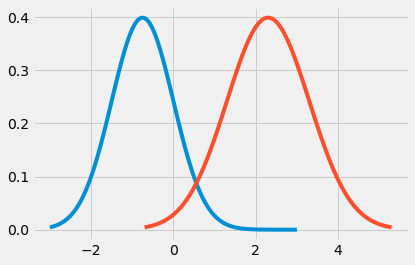

In [ ]:

mu = 0
sigma = 1
x1 =np.linspace(mu - 3*sigma, mu + 3*sigma, 100).tolist()

y1 = stats.norm.pdf(x, mu, sigma).tolist()

mu_1 = 2.3
sigma_1 = 1
x2 = [1, 3, 5]

x2 =np.linspace(mu_1 - 3*sigma_1, mu_1 + 3*sigma_1, 100).tolist()

y2 = stats.norm.pdf(x2, mu_1, sigma_1).tolist()


plt.plot(x1, y1)
plt.plot(x2, y2)


In [ ]:
import random

In [ ]:
def Gaussian_Mixture(word_length):

  thorough_avg_time = word_length/4
  skimmming_avg_time = thorough_avg_time/5
  
  mu_2 = thorough_avg_time
  sigma_2 = 40
  x2 =np.linspace(mu_2 - 3*sigma_2, mu_2 + 3*sigma_2, 100).tolist()

  y2 = stats.norm.pdf(x1, mu_2, sigma_2).tolist()

  mu_3 = skimmming_avg_time
  sigma_3 = 20


  x3 =np.linspace(mu_3 - 3*sigma_3, mu_3 + 3*sigma_3, 100).tolist()

  y3 = stats.norm.pdf(x3, mu_3, sigma_3).tolist()

  y4 = 50*y2 + 40*y3
  random_time = random.choice(y4)


  return(random_time) 





### Making a new dataframe of 1000 users using Gaussian Mixture Model

In [ ]:
import random

new_users= 1000                                 #ENTER THE NUMBER OF NEW USERS you want to add


NEW_USER_PROFILE=[]
 
# UserId  SessionID  ArticleID  Time_Spent 
for j in range(new_users):
    UserID = []
    SessionID = []
    ArticleID = []
    Time_Spent = []
  
    
   
    for i in range(5):
        ArticleID.append(random.randint(0, 3035))
        UserID.append(j)
        SessionID.append(1)
        Time_Spent.append(10000*Gaussian_Mixture(len(wordtokens_article[j])))

    profile_new=pd.DataFrame()
    profile_new['UserID']= UserID
    profile_new["SessionID"]= SessionID
    profile_new['AticleID'] = ArticleID
    profile_new['Time_Spent']= Time_Spent

    profile_new.sort_values(by=['UserID'], inplace=True,ascending=True)
    NEW_USER_PROFILE.append(profile_new)
  

In [ ]:
NEW_USER_PROFILE

[   UserID  SessionID  AticleID  Time_Spent
 0       0          1      1860   85.601760
 1       0          1      1894  142.730583
 2       0          1       345    4.452909
 3       0          1       765   85.529989
 4       0          1       313   87.957930,
    UserID  SessionID  AticleID  Time_Spent
 0       1          1      2528  192.189042
 1       1          1      2792    0.453233
 2       1          1      1759  120.985362
 3       1          1      2470   72.344275
 4       1          1      2790    0.666730,
    UserID  SessionID  AticleID  Time_Spent
 0       2          1      1731    1.168561
 1       2          1      2605  113.661753
 2       2          1      2481    1.272788
 3       2          1       829   11.361116
 4       2          1      2328  106.389965,
    UserID  SessionID  AticleID  Time_Spent
 0       3          1      2034  156.457778
 1       3          1       802   63.434764
 2       3          1      2933   55.929889
 3       3          1      29

In [ ]:
len(NEW_USER_PROFILE)

1000

## Making the Neighbour Matrix for collaborative Filtering

To implement collaborative filtering neighbour users in the user space are found out, to identify there trends in reading articles and recommend future articles to current user based on the reading pattern of neighbor user

As the platform is new and doesn't have physical users for which clickstream data is available so the clickstream data for artificial users which is constructed previously is used to make recommendations to current user

In [ ]:
neighbours_profile = np.empty((1000,10),float)

#arr = np.append(arr, np.array([[10,20,30]]), axis=0)
#arr = np.append(arr, np.array([[40,50,60]]), axis=0)
#print("After adding two new arrays:")
#print(arr)

for j in range(1000):
  neighbours_df = NEW_USER_PROFILE[j]
  x,y = neighbours_df.shape
  print(j)

  list_word_tokens = [ ]
  list_clustered_articles = [ ]
  list_time = [ ]

  for i in range(x):
    #print(i)
    list_word_tokens.append(wordtokens_article[int(neighbours_df.iloc[i]['AticleID'])-1])
    list_clustered_articles.append(clustered_articles_matrix[int(neighbours_df.iloc[i]['AticleID'])-1])
    list_time.append(neighbours_df.iloc[i]['Time_Spent'])
   
  userProfile_all = user_profiler(list_word_tokens,list_clustered_articles,list_time)
  #print(userProfile_all)
  #neighbours_profile = np.append(neighbours_profile, np.array(userProfile_all), axis = 0)
  neighbours_profile = np.vstack ((neighbours_profile, userProfile_all))

In [ ]:
type(neighbours_profile)
neighbours_profile.shape

(2000, 10)

## Dataframe containg 1000 artificial Users

In [ ]:
neighbours_profile = neighbours_profile[1000:2000]
neighbours_profile.shape


(1000, 10)

## 1 artificial User

In [ ]:
px = neighbours_profile[1].reshape(1,10)
px.shape

(1, 10)

In [ ]:
new_user = neighbours_profile[random.randint(0,999)].reshape(1,10)        
new_user.shape  

(1, 10)

## Content Recommender Calculator

Top 10 aticles based on the Content Recommendation approach ar outputed with their scores

In [ ]:
def Content_Recommends_Calculator(user_profile,clustered_articles_matrix) :
    
    user_interested_articles = []
    
    contents_interest_score = []

    user_preffered_articles = cosine_similarity(userProfile_one.reshape(1,-1),clustered_articles_matrix)
    
    top_articles = np.sort(user_preffered_articles).flatten()[::-1][:10]
    
    user_interested_articles.append(top_articles)
    
    content_interest_score = (user_interested_articles[0] * 0.4)
    
    return content_interest_score


In [ ]:
content_recommended = Content_Recommends_Calculator(userProfile_one,clustered_articles_matrix)
content_recommended

array([0.39991511, 0.39966572, 0.39960569, 0.39942593, 0.39941639,
       0.39758458, 0.39682041, 0.39681086, 0.39676962, 0.396743  ])

## Colloborative

Top 10 similar articles based on collaborative learning approach are outputed with their scores

In [ ]:
## Colloborative
def Collaborative_Recommends_Calculator(existing_usr,new_usr) :
    
    collaborative_interest_score = [ ]
    sorted_collaborative_interest = [ ]
    
    collaborative_interest_score = cosine_similarity(existing_usr,new_usr)
    
    sorted_collaborative_interest = np.argsort(collaborative_interest_score,axis=0)[::-1][:10]
    
    sorted_collaborative_indexes = existing_usr[sorted_collaborative_interest]
    
    collab_interest = np.mean(sorted_collaborative_indexes.reshape(-1,10),axis=0)
    
    collaborative_interest_scores = collab_interest*0.6
    
    return collaborative_interest_scores

In [ ]:
collab_recommended = Collaborative_Recommends_Calculator(neighbours_profile,new_user)
collab_recommended

array([0.93602125, 0.95446294, 0.64881096, 0.93733883, 0.89203128,
       0.99961383, 0.99420059, 0.825235  , 0.9654006 , 0.97295594])

## Trending Articles

Trending articles are calculated based on the articles which are read by most of the users

In [ ]:
def Trends(trending) :

    trends = np.mean(existing_users,axis=0)
    Trending_news = cosine_similarity(trends.reshape(1,10),clustered_articles_matrix)
    top= np.sort(Trending_news)[::-1][0][:10]
    return top

## Hybrid Recommender

Program uses Hybrid recommender approach which recommends user different articles with similar articles calculated based on Content learning, collaborative learning and trending articles. 

Hybrid recommender outputs 10 articles which are found most similar to user reading pattern. The recommended articles contain 30% identified from content learning, 40% identified from collaborative learning, and 30% identified from trending articles

Collaborative learning and trending articles appraoch takes care of exploration part of recommendation as the recommender avoid the bias which might be faced by recommending articles solely based on users reading pattern(content based learning).

In [ ]:
def Hybrid_Calculator():
    
    hybrid_interests = np.add(content_recommended,collab_recommended)
    
    similar_scores = cosine_similarity(hybrid_interests.reshape(1,10),clustered_articles_matrix)
    
    recommended_article_address =  np.argsort(similar_scores)[::-1]
    
    return recommended_article_address

In [ ]:
hybrid_recommend_indexes =  Hybrid_Calculator()

In [ ]:
labels = kmeans.labels_
labels

array([4, 4, 6, ..., 6, 9, 5], dtype=int32)

In [ ]:
maxx = np.argmax(clustered_articles_matrix,axis=1) 
maxx

array([3, 3, 3, ..., 3, 3, 3])

In [ ]:
for articles in hybrid_recommend_indexes :
    
    print('Recommended-Articles :')
    
    print('\n')
    
    print(title[articles][:no_of_recommends])  

Recommended-Articles :


1949    ISL 2020-21 Final, Mumbai City vs ATK Mohun Ba...
2415     Ahan Shetty Shares Loved Up Pics On Childhood...
2029    Road Safety World Series 2021, BAN Legends vs ...
2551     The Secret Behind Athiya Shetty's Dreamy Look...
1102    Will no longer call RSS ‘Sangh Parivar’, it’s ...
999       Four-phase UP panchayat polls to begin April 15
1272    LS passes Marine Aids to Navigation Bill by vo...
2009    Road Safety World Series 2021, ENG Legends vs ...
3018    Mumbai Saga First Song Shor Machega To Release...
2354     Ira Khan Opens Up About Her "Attempts At Heal...
Name: Headline, dtype: object
